In [14]:
from tensorflow import keras
from keras.utils import image_dataset_from_directory
import numpy as np

In [15]:
train_data = image_dataset_from_directory('./ecosystems/train/', batch_size=8, image_size=(300,300))
validation_data = image_dataset_from_directory('./ecosystems/val/', batch_size=8, image_size=(300,300))
test_data = image_dataset_from_directory('./ecosystems/test/', batch_size=16, image_size=(300,300))

Found 2000 files belonging to 2 classes.
Found 658 files belonging to 2 classes.
Found 400 files belonging to 2 classes.


In [16]:
from keras import Sequential
from keras import layers
model = Sequential()
model.add(layers.Conv2D(8, (3,3), activation='relu', input_shape=(300,300,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(16, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model

In [17]:
from keras.optimizers.rmsprop import RMSprop
from keras.optimizers.adam import Adam
epochs = 2
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [18]:
history = model.fit(train_data,epochs=epochs,validation_data=validation_data,validation_batch_size=8)

Epoch 1/3


2023-06-18 09:57:54.248418: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2000]
	 [[{{node Placeholder/_4}}]]
2023-06-18 09:57:54.248934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2000]
	 [[{{node Placeholder/_4}}]]


250/250 [==============================] - ETA: 0s - loss: 30.1744 - accuracy: 0.8990

2023-06-18 09:58:13.741545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [658]
	 [[{{node Placeholder/_0}}]]
2023-06-18 09:58:13.741741: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [658]
	 [[{{node Placeholder/_4}}]]


250/250 [==============================] - 21s 81ms/step - loss: 30.1744 - accuracy: 0.8990 - val_loss: 13.5581 - val_accuracy: 0.8587
Epoch 2/3
250/250 [==============================] - 20s 80ms/step - loss: 3.2912 - accuracy: 0.9405 - val_loss: 2.3450 - val_accuracy: 0.9286
Epoch 3/3
250/250 [==============================] - 20s 79ms/step - loss: 0.3047 - accuracy: 0.9755 - val_loss: 3.2352 - val_accuracy: 0.9149


# graph accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


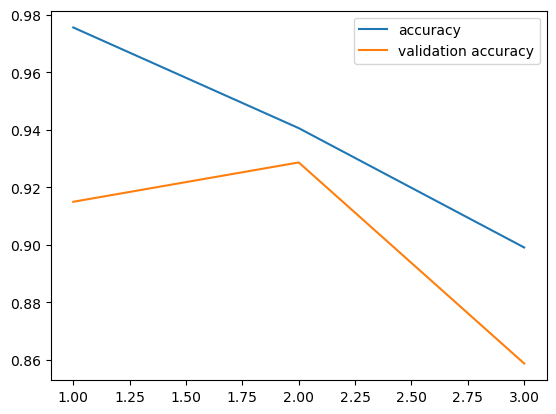

In [19]:
import matplotlib.pyplot as plt

x = np.linspace(epochs,1,epochs)
print(history.history.keys())

acc_plt, = plt.plot(x, history.history['accuracy'])
val_acc_plt, = plt.plot(x, history.history['val_accuracy'])
plt.legend([acc_plt, val_acc_plt],['accuracy', 'validation accuracy'])

# graph loss

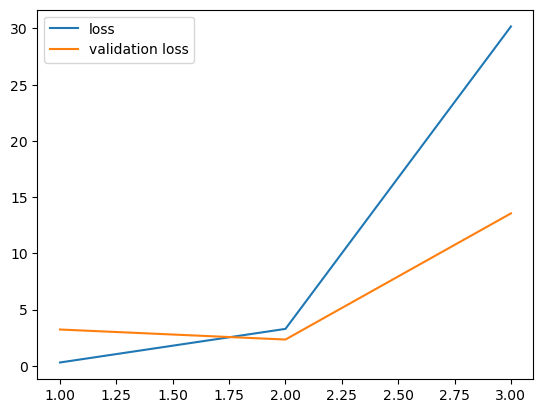

In [20]:
loss_plt, = plt.plot(x,history.history['loss'])
val_loss_plt, = plt.plot(x,history.history['val_loss'])
plt.legend([loss_plt, val_loss_plt],['loss','validation loss'])

In [21]:
model.evaluate(test_data)

 1/25 [>.............................] - ETA: 3s - loss: 4.6039e-06 - accuracy: 1.0000

2023-06-18 09:59:12.943082: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [400]
	 [[{{node Placeholder/_4}}]]
2023-06-18 09:59:12.943270: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [400]
	 [[{{node Placeholder/_4}}]]


25/25 [==============================] - 1s 39ms/step - loss: 2.8248 - accuracy: 0.9025


[2.8247759342193604, 0.9024999737739563]